In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [8]:
train_data = pd.read_csv('labeledTrainData.tsv', delimiter='\t')
train_data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [9]:
print('학습 데이터 : ', len(train_data))

학습 데이터 :  25000


In [10]:
train_length = train_data['review'].apply(len)
train_length.head()

0    2302
1     946
2    2449
3    2245
4    2231
Name: review, dtype: int64

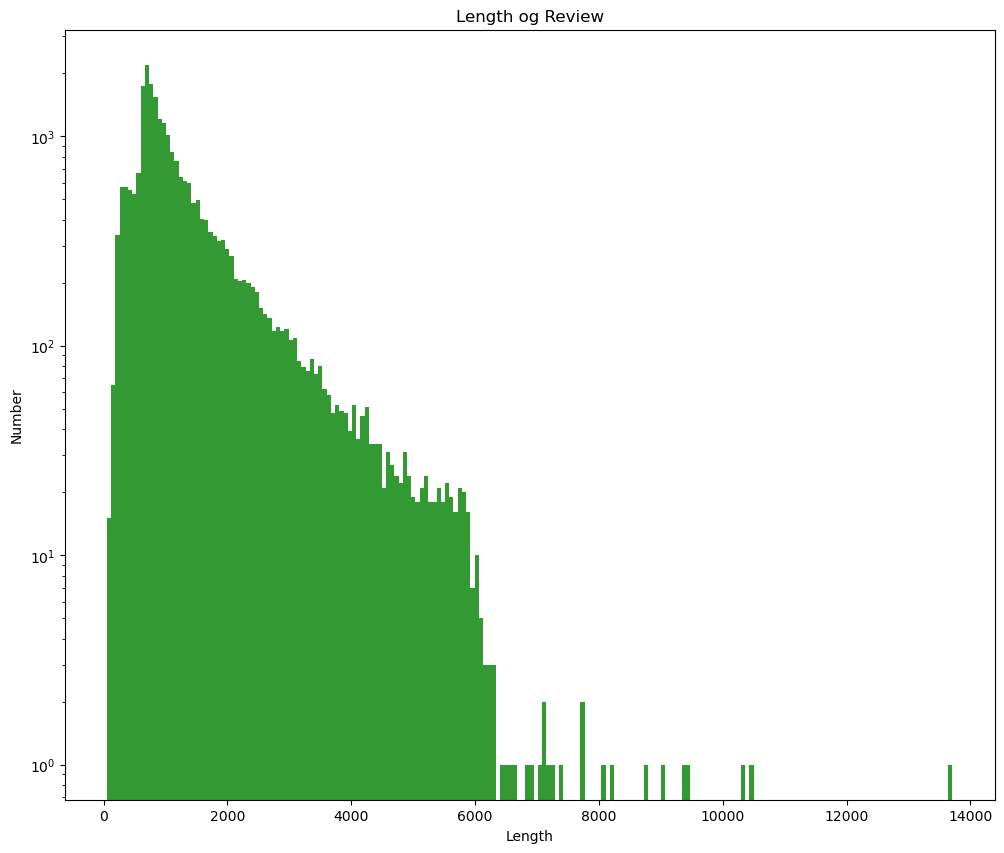

In [11]:
plt.figure(figsize=(12, 10))

plt.hist(train_length, bins=200, alpha=0.8, color='g', label='word')
plt.yscale('log')

plt.xlabel('Length')
plt.ylabel('Number')
plt.title('Length og Review')
plt.show()

In [12]:
print('최대 길이 : ', np.max(train_length))
print('최소 길이 : ', np.min(train_length))
print('평균 길이 : {:.2f}'.format(np.mean(train_length)))
print('표준편차 : {:.2f}'.format(np.std(train_length)))
print('중간 값 : ', np.median(train_length))

최대 길이 :  13708
최소 길이 :  52
평균 길이 : 1327.71
표준편차 : 1005.22
중간 값 :  981.0


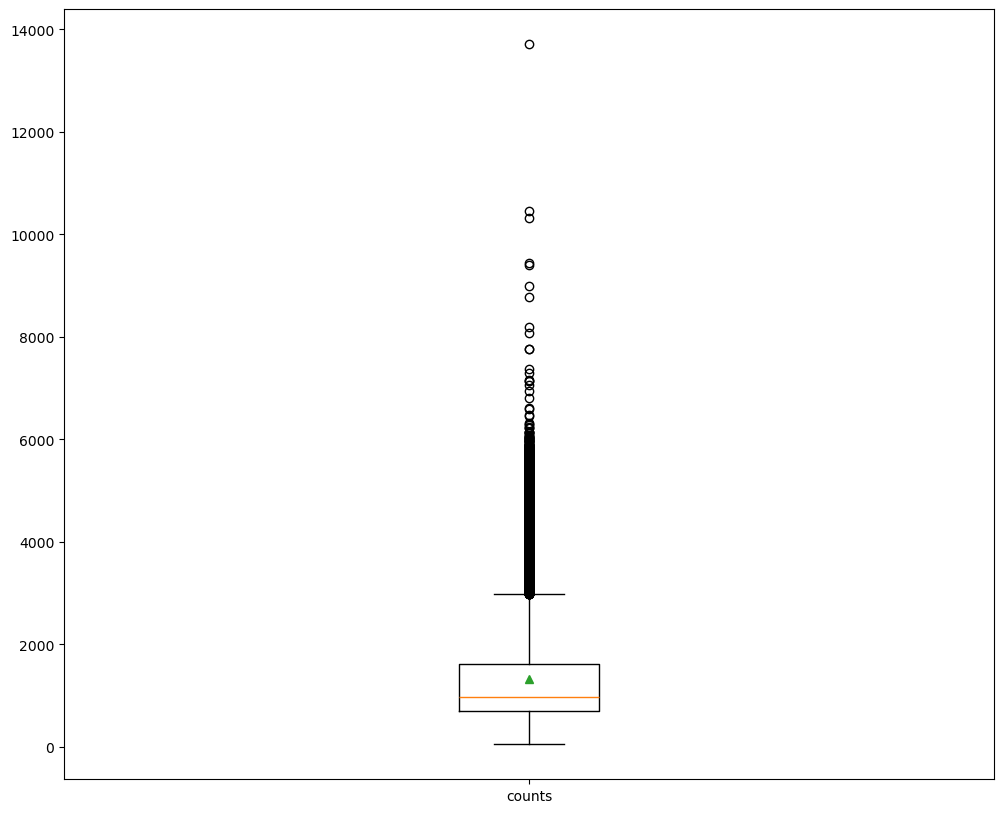

In [13]:
plt.figure(figsize=(12, 10))

plt.boxplot(train_length, labels=['counts'], showmeans=True)
plt.show()

In [15]:
print('긍정 리뷰 : ', train_data['sentiment'].value_counts()[1])
print('부정 리뷰 : ', train_data['sentiment'].value_counts()[0])

긍정 리뷰 :  12500
부정 리뷰 :  12500


In [16]:
import re
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [17]:
train_data['review'][2]

"The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carradine) to Primal Park . A secret project mutating a primal animal using fossilized DNA, like ¨Jurassik Park¨, and some scientists resurrect one of nature's most fearsome predators, the Sabretooth tiger or Smilodon . Scientific ambition turns deadly, however, and when the high voltage fence is opened the creature escape and begins savagely stalking its prey - the human visitors , tourists and scientific.Meanwhile some youngsters enter in the restricted area of the security center and are attacked by a pack of large pre-historical animals which are deadlier and bigger . In addition , a security agent (Stacy Haiduk) and her mate (Brian Wimmer) fight hardly against the carnivorous Smilodons. The Sabretooths, themselves , of course, are the real star stars and they are astounding terrifyingly though not convincing. The giant animals savagely are stalking its prey and the group run afoul and fight against on

In [24]:
review = train_data['review'][3]
review_text = BeautifulSoup(review, 'html.parser').get_text()
review_text = re.sub('[^a-zA-Z\s]', '', review_text)

In [25]:
review_text

'It must be assumed that those who praised this film the greatest filmed opera ever didnt I read somewhere either dont care for opera dont care for Wagner or dont care about anything except their desire to appear Cultured Either as a representation of Wagners swansong or as a movie this strikes me as an unmitigated disaster with a leaden reading of the score matched to a tricksy lugubrious realisation of the textIts questionable that people with ideas as to what an opera or for that matter a play especially one by Shakespeare is about should be allowed anywhere near a theatre or film studio Syberberg very fashionably but without the smallest justification from Wagners text decided that Parsifal is about bisexual integration so that the title character in the latter stages transmutes into a kind of beatnik babe though one who continues to sing high tenor  few if any of the actors in the film are the singers and we get a double dose of Armin Jordan the conductor who is seen as the face b

In [26]:
stop_words = set(stopwords.words('english'))
review_text = review_text.lower()

words = review_text.split()
words = [w for w in words if not w in  stop_words]
print(words)

['must', 'assumed', 'praised', 'film', 'greatest', 'filmed', 'opera', 'ever', 'didnt', 'read', 'somewhere', 'either', 'dont', 'care', 'opera', 'dont', 'care', 'wagner', 'dont', 'care', 'anything', 'except', 'desire', 'appear', 'cultured', 'either', 'representation', 'wagners', 'swansong', 'movie', 'strikes', 'unmitigated', 'disaster', 'leaden', 'reading', 'score', 'matched', 'tricksy', 'lugubrious', 'realisation', 'textits', 'questionable', 'people', 'ideas', 'opera', 'matter', 'play', 'especially', 'one', 'shakespeare', 'allowed', 'anywhere', 'near', 'theatre', 'film', 'studio', 'syberberg', 'fashionably', 'without', 'smallest', 'justification', 'wagners', 'text', 'decided', 'parsifal', 'bisexual', 'integration', 'title', 'character', 'latter', 'stages', 'transmutes', 'kind', 'beatnik', 'babe', 'though', 'one', 'continues', 'sing', 'high', 'tenor', 'actors', 'film', 'singers', 'get', 'double', 'dose', 'armin', 'jordan', 'conductor', 'seen', 'face', 'heard', 'voice', 'amfortas', 'also'

In [27]:
# 해당 단어들을 다시 합쳐서 string 형태로 변환
clean_review = ' '.join(words)
print(clean_review)

must assumed praised film greatest filmed opera ever didnt read somewhere either dont care opera dont care wagner dont care anything except desire appear cultured either representation wagners swansong movie strikes unmitigated disaster leaden reading score matched tricksy lugubrious realisation textits questionable people ideas opera matter play especially one shakespeare allowed anywhere near theatre film studio syberberg fashionably without smallest justification wagners text decided parsifal bisexual integration title character latter stages transmutes kind beatnik babe though one continues sing high tenor actors film singers get double dose armin jordan conductor seen face heard voice amfortas also appears monstrously double exposure kind batonzilla conductor ate monsalvat playing good friday music way transcendant loveliness nature represented scattering shopworn flaccid crocuses stuck illlaid turf expedient baffles theatre sometimes piece imperfections thoughts cant think syberb

In [28]:
def preprocessing(review, remove_stopwords):
    review_text = BeautifulSoup(review, 'html.parser').get_text()
    review_text = re.sub('[^a-zA-Z]', ' ', review_text)

    words = review_text.lower().split()

    if remove_stopwords:
        stops = set(stopwords.words('english'))
        words = [w for w in words if not w in stops]

        clean_review = ' '.join(words)

    else:
        clean_review = ' '.join(words)

    return clean_review

In [30]:
clean_train_reviews = []
for review in train_data['review']:
    clean_train_reviews.append(preprocessing(review, True))

clean_train_reviews[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [31]:
clean_train_df = pd.DataFrame({'review':clean_train_reviews, 'sentiment': train_data['sentiment']})
clean_train_df.head()

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1


In [32]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

In [33]:
print(text_sequences[0])

[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12

In [34]:
word_vocab = tokenizer.word_index
word_vocab

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'get': 14,
 'bad': 15,
 'people': 16,
 'also': 17,
 'first': 18,
 'great': 19,
 'made': 20,
 'way': 21,
 'make': 22,
 'could': 23,
 'movies': 24,
 'think': 25,
 'characters': 26,
 'character': 27,
 'watch': 28,
 'two': 29,
 'films': 30,
 'seen': 31,
 'many': 32,
 'life': 33,
 'plot': 34,
 'acting': 35,
 'never': 36,
 'love': 37,
 'little': 38,
 'best': 39,
 'show': 40,
 'know': 41,
 'ever': 42,
 'man': 43,
 'better': 44,
 'end': 45,
 'still': 46,
 'say': 47,
 'scene': 48,
 'scenes': 49,
 'go': 50,
 'something': 51,
 'back': 52,
 'real': 53,
 'watching': 54,
 'though': 55,
 'thing': 56,
 'old': 57,
 'years': 58,
 'actors': 59,
 'director': 60,
 'work': 61,
 'another': 62,
 'new': 63,
 'nothing': 64,
 'funny': 65,
 'actually': 66,
 'makes': 67,
 'look': 68,
 'find': 69,
 'going': 70,
 'part': 71,
 'lot': 72,
 'every': 73,
 'wo

In [43]:
word_vocab['<PAD>'] = 0 # 패딩 토큰을 위해 작성(데이터에 영향을 주지 않도록)
len(word_vocab)

74066

In [44]:
data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [45]:
MAX_LENGTH = 174

train_inputs = pad_sequences(text_sequences, maxlen=MAX_LENGTH, padding='post')

print(train_inputs.shape)

(25000, 174)


In [46]:
train_labels = np.array(train_data['sentiment'])
print(train_labels.shape)

(25000,)


In [48]:
train_input_data = 'train_input.npy'
train_label_data = 'train_label.npy'
train_clean_data = 'train_clean.csv'
data_configs = 'data_configs.json'

In [ ]:
test_data = pd.read_csv('testData.tsv', header=0, delimiter='\t', quoting=3)

clean_test_reviews = []
for review in test_data['review']:
    clean_test_reviews.append(preprocessing(review, True))

clean_test_df = pd.DataFrame({'review':clean_test_reviews, 'id' : test_data['id']})
test_id = np.array(test_data['id'])

text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
text_inputs = pad_sequences(text_sequences, maxlen=MAX_LENGTH, padding='post')

In [51]:
test_input_data = 'test_input.npy'
test_clean_data = 'test_clean.csv'
test_id_data = 'test_id.npy'

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [55]:
# 여기서부터 data 속 파일을 가져오라고 하는데 난 따로 만들어두질 않았음....

In [ ]:
reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])